In [17]:
# -----------------------------------------------
# 📦 Import Libraries
# -----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# -----------------------------------------------
# 📂 Load Cleaned Data
# -----------------------------------------------
df = pd.read_json("../data/jobs_cleaned.json")
df.head()

,id,epoch,Posted Date,Company,Job Title,Description,Location,salary_min,salary_max,apply_url,original,verified
0,1093353,1749722402,1749722402000,Jito Foundation,Head of APAC BD,"<p><b style=""font-size: 18px;"">About Jito Foun...","Remote, Singapore &Amp; Hk Preferred - Other A...",40000,80000,https://remoteOK.com/remote-jobs/remote-head-o...,NaN,NaN
1,1093348,1749664804,1749664804000,Toku,Token Plan Administrator,"<p><span style=""font-size: 11pt"">We are lookin...",United States,50000,70000,https://remoteOK.com/remote-jobs/remote-token-...,NaN,NaN
2,1093329,1749448804,1749448804000,Ontario Securities Commission,Senior Crypto and Open Source Intelligence Spe...,"Business Unit Regular, Full time Closing Date:...",Ca On Toronto,40000,80000,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN
3,1093327,1749398407,1749398407000,2100 NVIDIA USA,Senior Systems Engineer Autonomous Vehicle Inf...,The autonomous vehicle (AV) infrastructure gro...,"Us, Ca, Santa Clara",65000,130000,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN
4,1093325,1749326407,1749326407000,110 Yahoo Holdings Inc.,Senior Production Engineer,Yahoo Mail is the ultimate consumer inbox with...,Us - United States Of America,67500,127500,https://remoteOK.com/remote-jobs/remote-senior...,NaN,NaN


In [3]:
# -----------------------------------------------
# 🔍 Quick Overview
# -----------------------------------------------

In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           52 non-null     int64  
 1   epoch        52 non-null     int64  
 2   Posted Date  52 non-null     int64  
 3   Company      52 non-null     object 
 4   Job Title    52 non-null     object 
 5   Description  52 non-null     object 
 6   Location     52 non-null     object 
 7   salary_min   52 non-null     int64  
 8   salary_max   52 non-null     int64  
 9   apply_url    52 non-null     object 
 10  original     0 non-null      float64
 11  verified     0 non-null      float64
dtypes: float64(2), int64(5), object(5)
memory usage: 5.0+ KB


In [5]:
# Check for nulls again just in case
df.isnull().sum()

id              0
epoch           0
Posted Date     0
Company         0
Job Title       0
Description     0
Location        0
salary_min      0
salary_max      0
apply_url       0
original       52
verified       52
dtype: int64

In [6]:
# Basic descriptive stats
df.describe(include='all')

,id,epoch,Posted Date,Company,Job Title,Description,Location,salary_min,salary_max,apply_url,original,verified
count,5.200000e+01,5.200000e+01,5.200000e+01,52,52,52,52,52.000000,52.000000,52,0.0,0.0
unique,NaN,NaN,NaN,46,51,52,26,NaN,NaN,52,NaN,NaN
top,NaN,NaN,NaN,Anchorage Digital,Frontend Software Engineer,"<p><b style=""font-size: 18px;"">About Jito Foun...",Remote,NaN,NaN,https://remoteOK.com/remote-jobs/remote-head-o...,NaN,NaN
freq,NaN,NaN,NaN,4,2,1,15,NaN,NaN,1,NaN,NaN
mean,1.093250e+06,1.748322e+09,1.748322e+12,NaN,NaN,NaN,NaN,60576.923077,95192.307692,NaN,NaN,NaN
std,4.900000e+01,6.537883e+05,6.537883e+08,NaN,NaN,NaN,NaN,25613.144721,31486.248764,NaN,NaN,NaN
min,1.093168e+06,1.747152e+09,1.747152e+12,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,1.093215e+06,1.747917e+09,1.747917e+12,NaN,NaN,NaN,NaN,44375.000000,70000.000000,NaN,NaN,NaN
50%,1.093242e+06,1.748218e+09,1.748218e+12,NaN,NaN,NaN,NaN,65000.000000,96250.000000,NaN,NaN,NaN
75%,1.093287e+06,1.748782e+09,1.748782e+12,NaN,NaN,NaN,NaN,70000.000000,120000.000000,NaN,NaN,NaN


C:\Temp\ipykernel_4424\1982517097.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="viridis")


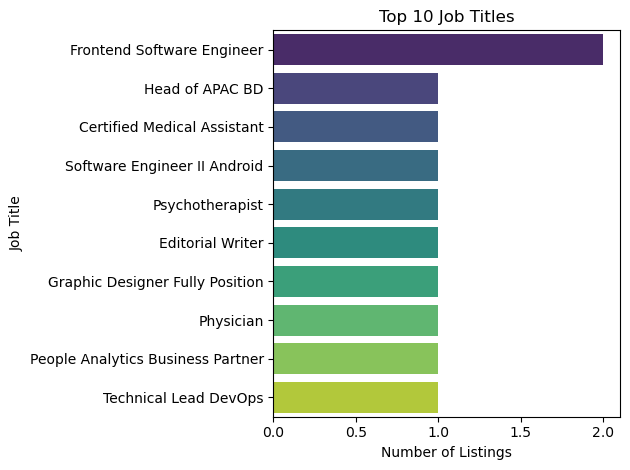

In [7]:
# -----------------------------------------------
# 💼 Top 10 Most Common Job Titles
# -----------------------------------------------
top_jobs = df['Job Title'].value_counts().head(10)

sns.barplot(y=top_jobs.index, x=top_jobs.values, palette="viridis")
plt.title("Top 10 Job Titles")
plt.xlabel("Number of Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

C:\Temp\ipykernel_4424\647384139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_companies.index, x=top_companies.values, palette="coolwarm")


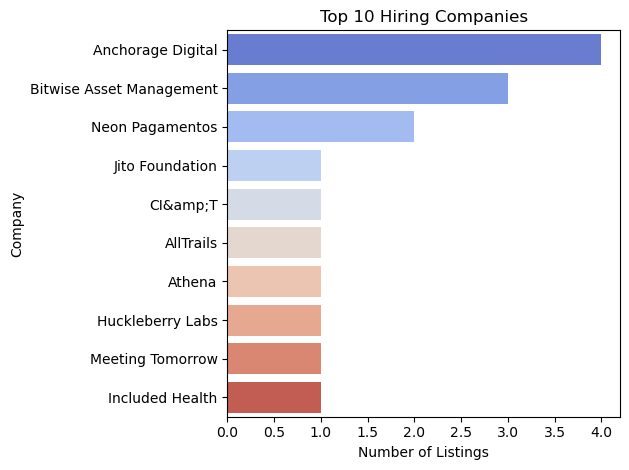

In [8]:
# -----------------------------------------------
# 🏢 Top 10 Companies Hiring
# -----------------------------------------------
top_companies = df['Company'].value_counts().head(10)

sns.barplot(y=top_companies.index, x=top_companies.values, palette="coolwarm")
plt.title("Top 10 Hiring Companies")
plt.xlabel("Number of Listings")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

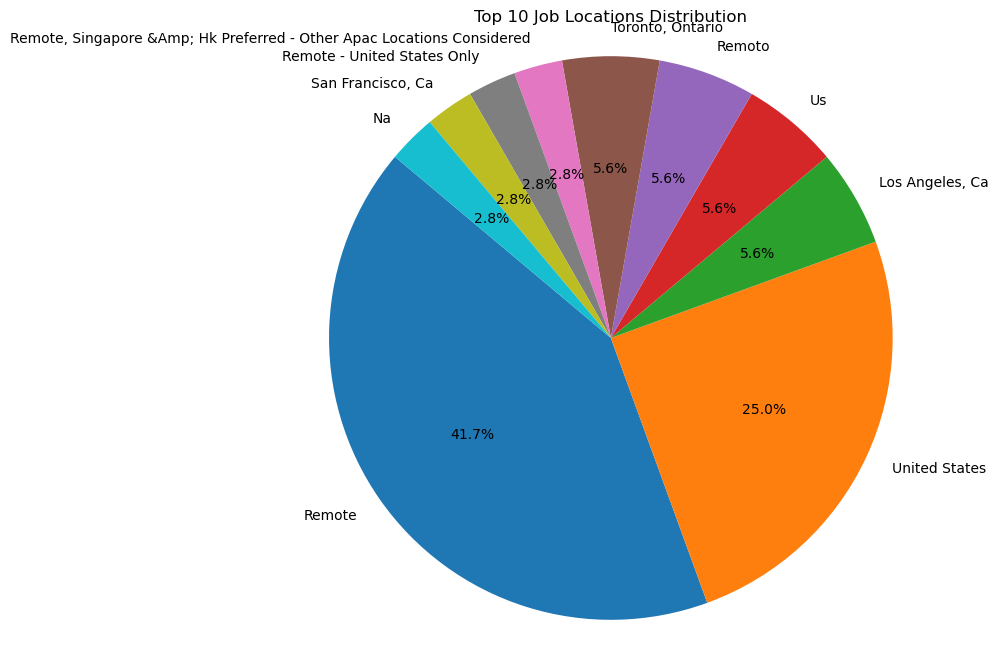

In [9]:
# -----------------------------------------------
# 📊 Top 10 most common locations
# -----------------------------------------------
top_locations = df["Location"].value_counts().head(10)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(top_locations.values, labels=top_locations.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Job Locations Distribution")
plt.axis('equal')
plt.show()

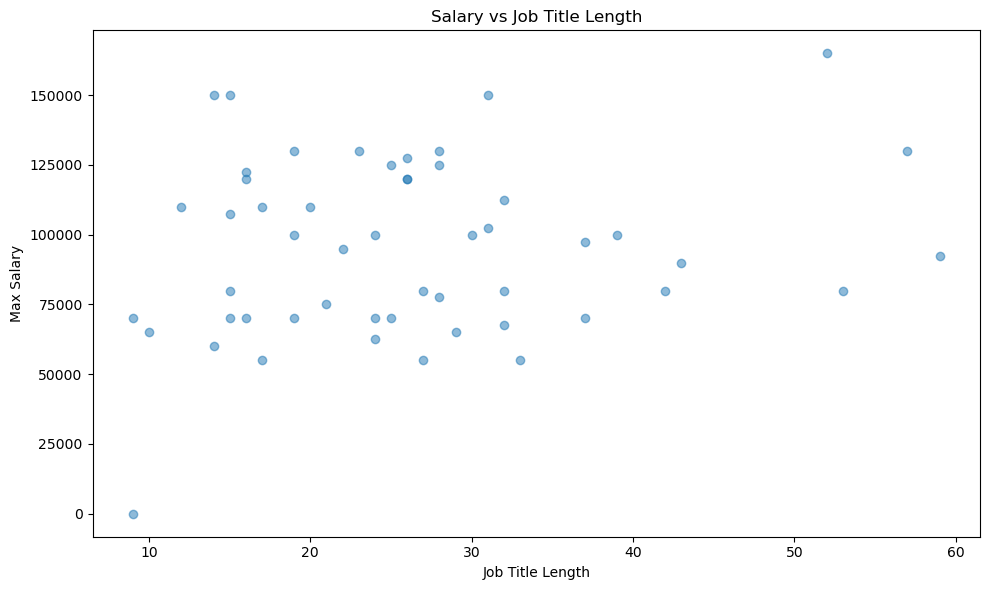

In [10]:
# -----------------------------------------------
# 📊 Top 10 most common locations
# -----------------------------------------------
df["title_length"] = df["Job Title"].str.len()

plt.figure(figsize=(10, 6))
plt.scatter(df["title_length"], df["salary_max"], alpha=0.5)
plt.xlabel("Job Title Length")
plt.ylabel("Max Salary")
plt.title("Salary vs Job Title Length")
plt.tight_layout()
plt.show()

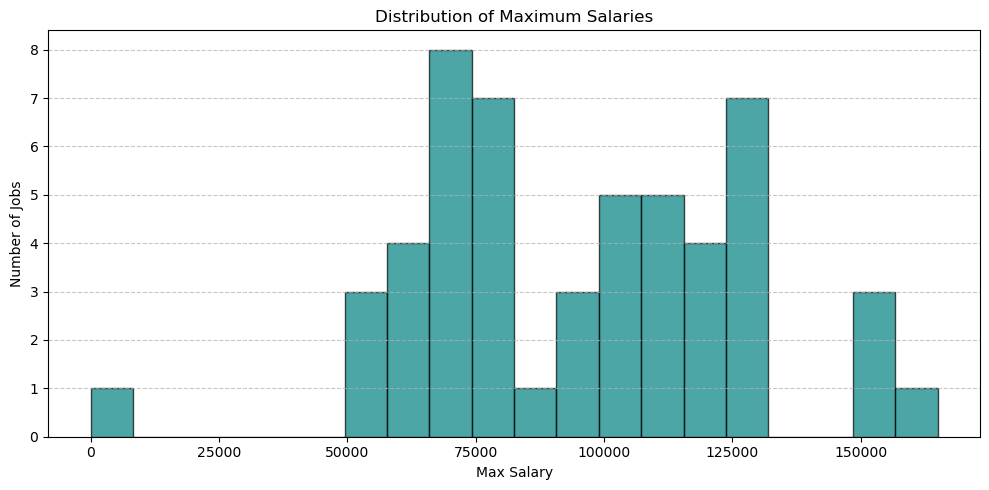

In [11]:
# -----------------------------------------------
# 📊 Maximum Salary Distribution
# -----------------------------------------------
plt.figure(figsize=(10, 5))
plt.hist(df["salary_max"].dropna(), bins=20, color="teal", edgecolor="black", alpha=0.7)
plt.title("Distribution of Maximum Salaries")
plt.xlabel("Max Salary")
plt.ylabel("Number of Jobs")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

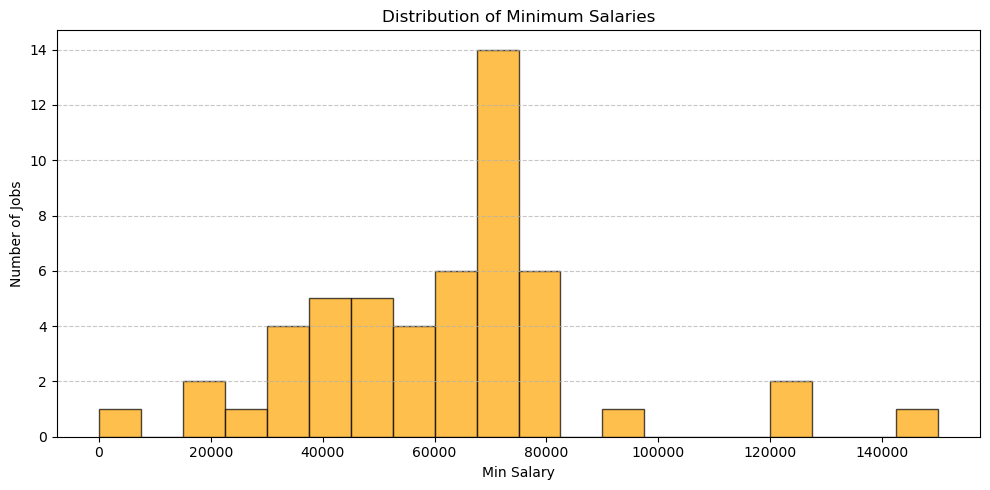

In [12]:
# -----------------------------------------------
# 📊 Minimum Salary Distribution
# -----------------------------------------------
plt.figure(figsize=(10, 5))
plt.hist(df["salary_min"].dropna(), bins=20, color="orange", edgecolor="black", alpha=0.7)
plt.title("Distribution of Minimum Salaries")
plt.xlabel("Min Salary")
plt.ylabel("Number of Jobs")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

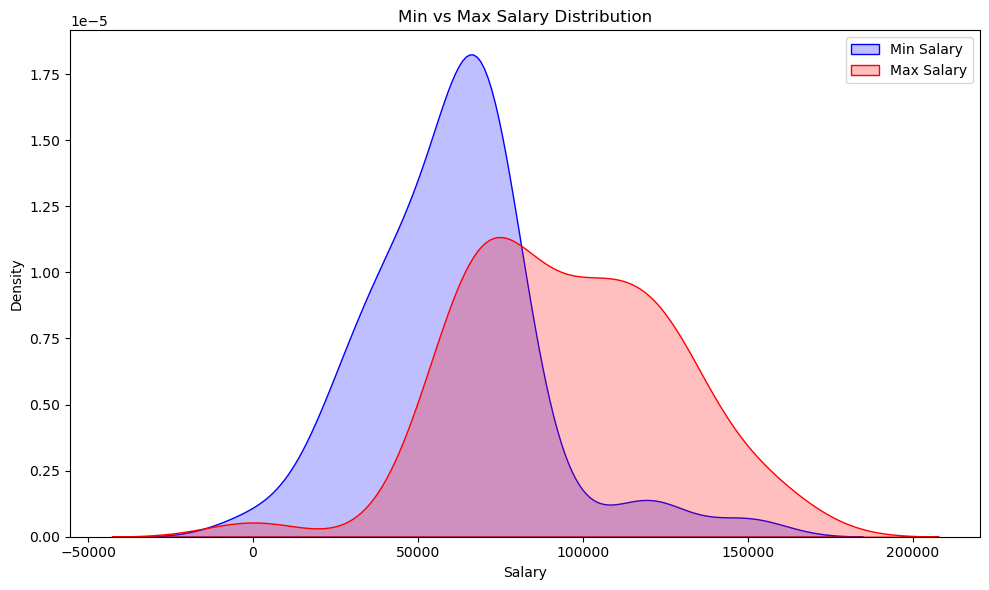

In [15]:
# -----------------------------------------------
# 📊 Salary Range Comparison (Min vs Max)
# -----------------------------------------------
plt.figure(figsize=(10, 6))
sns.kdeplot(df["salary_min"].dropna(), label="Min Salary", fill=True, color="blue")
sns.kdeplot(df["salary_max"].dropna(), label="Max Salary", fill=True, color="red")
plt.title("Min vs Max Salary Distribution")
plt.xlabel("Salary")
plt.legend()
plt.tight_layout()
plt.show()